<a href="https://colab.research.google.com/github/priyal-khapra/Beginner-Projects-DL/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
x = tf.ones(shape = (2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal(shape= (3,2) , mean = 0 , stddev= 2)
print(x)

tf.Tensor(
[[ 4.8862348  0.5692914]
 [-2.730513  -1.4131119]
 [-1.0627676 -1.9216428]], shape=(3, 2), dtype=float32)


In [ ]:
x = tf.random.uniform(shape = (3,2) , minval = 9 , maxval = 11 )
print(x)

tf.Tensor(
[[ 9.885111 10.88766 ]
 [10.376493 10.224018]
 [ 9.878515 10.370666]], shape=(3, 2), dtype=float32)


In [ ]:
import numpy as np
x = np.ones(shape = (3,4))
x[2,3] = 9 
print(x)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 9.]]


In [ ]:
x = tf.ones(shape = (3,4))
x[2,3] = 9 
print(x)

TypeError: ignored

In [ ]:
# create tensor variables 
v= tf.Variable(initial_value = tf.random.normal(shape = (3,4) , mean = 9 , stddev = 9))
print(v)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 6.261051 , 23.315022 ,  8.866318 , -6.229332 ],
       [-3.4236584, 16.77229  ,  8.228319 , -1.854866 ],
       [ 3.5443397,  4.001114 , 18.39028  , 16.625797 ]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3,4)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [ ]:
v[0,0].assign(5.)

<tf.Variable 'UnreadVariable' shape=(3, 4) dtype=float32, numpy=
array([[5., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [ ]:
v.assign_add(tf.ones(shape = (3,4)))

<tf.Variable 'UnreadVariable' shape=(3, 4) dtype=float32, numpy=
array([[6., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]], dtype=float32)>

In [ ]:
v.assign_sub(tf.ones(shape = (3,4)))

<tf.Variable 'UnreadVariable' shape=(3, 4) dtype=float32, numpy=
array([[5., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [ ]:
# mathematical operations 
a = tf.ones(shape = (2,2))
b = tf.square(a)
print(b)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
c = tf.sqrt(a)
print(c)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
d = b + c
print(d)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


In [ ]:
e = tf.matmul(d,c)
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
e *= d 
print(e)

tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [ ]:
input_var = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
  new_var = tf.square(input_var)
gradient = tape.gradient(new_var,input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape: 
  tape.watch(input_const)
  new_var = tf.square(input_const)
gradient = tape.gradient(new_var, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean = [0,3], cov = [[1,0.5],[0.5,1]] , size = num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean = [3,0], cov = [[1,0.5],[0.5,1]] , size = num_samples_per_class )

In [ ]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)
inputs

array([[ 0.11199884,  1.7016205 ],
       [-1.9999757 ,  2.4316216 ],
       [-1.0248317 ,  2.9245594 ],
       ...,
       [ 3.9477952 ,  0.05016526],
       [ 3.2698743 ,  0.27514648],
       [ 2.7828598 , -0.5561232 ]], dtype=float32)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class,1),dtype = 'float32'),np.ones((num_samples_per_class,1), dtype = 'float32')))

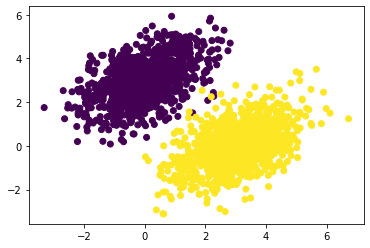

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c = targets)
plt.show()

In [ ]:
input_dim = 2 
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim,output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim,)))

In [ ]:
# creating the forward pass function 
def model(inputs):
 return tf.matmul(inputs, W) + b
# tf.matmul(inputs,W) is your predicted ans

In [ ]:
# loss function - mean squared loss, because its a linear classifier
def square_loss(targets, predictions):
 per_sample_losses = tf.square(targets - predictions) 
 return tf.reduce_mean(per_sample_losses) 

In [ ]:
# training step function 
learning_rate = 0.1
def training_step(inputs, targets):
 with tf.GradientTape() as tape: 
  predictions = model(inputs) 
  loss = square_loss(predictions, targets) 
 grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) 
 W.assign_sub(grad_loss_wrt_W * learning_rate) 
 b.assign_sub(grad_loss_wrt_b * learning_rate) 
 return loss

In [ ]:
# batch training 
for step in range(30):
 loss = training_step(inputs, targets)
 print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 0.0363
Loss at step 1: 0.0354
Loss at step 2: 0.0346
Loss at step 3: 0.0339
Loss at step 4: 0.0332
Loss at step 5: 0.0326
Loss at step 6: 0.0320
Loss at step 7: 0.0315
Loss at step 8: 0.0311
Loss at step 9: 0.0306
Loss at step 10: 0.0303
Loss at step 11: 0.0299
Loss at step 12: 0.0296
Loss at step 13: 0.0293
Loss at step 14: 0.0290
Loss at step 15: 0.0288
Loss at step 16: 0.0285
Loss at step 17: 0.0283
Loss at step 18: 0.0281
Loss at step 19: 0.0280
Loss at step 20: 0.0278
Loss at step 21: 0.0277
Loss at step 22: 0.0275
Loss at step 23: 0.0274
Loss at step 24: 0.0273
Loss at step 25: 0.0272
Loss at step 26: 0.0271
Loss at step 27: 0.0270
Loss at step 28: 0.0269
Loss at step 29: 0.0269


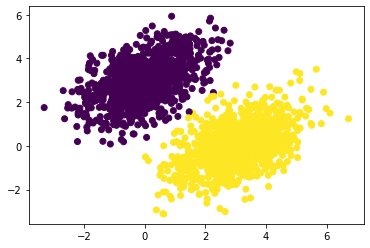

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c= predictions > 0.5)
plt.show()

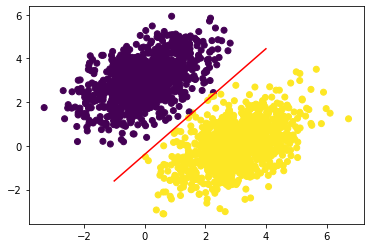

In [ ]:
x = np.linspace(-1, 4, 100) 
y = - W[0] / W[1] * x + (0.5 - b) / W[1] 
plt.plot(x, y, '-r') 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions > 0.5)

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data , train_labels) , (test_data,test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# decoding the integer indices in input data to check what it really means
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# vectorising the input data from integer values to values in 0's and 1's format
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension)) 
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1. 
 return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data) 

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# vectorising labels (which are already in 0's and 1's format)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
train_labels
y_train
# after this step the data is ready to be fed into the model 

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# preparing the model
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential()
# Adds a densely-connected layer with 16 units to the model:
model.add(keras.layers.Dense(16, activation='relu'))
# Add another:
model.add(keras.layers.Dense(16, activation='relu'))
# Add a softmax layer with 1 output units:
model.add(keras.layers.Dense(1, activation='softmax'))


In [ ]:
model.compile(optimizer = "rmsprop" , loss = "binary_crossentropy" , metrics = ["accuracy"])